In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import os
from util import RESOURCE_DIR

In [21]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [97]:
data_with_index = df.set_index("Projects")
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [98]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    67
dtype: int64

In [99]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

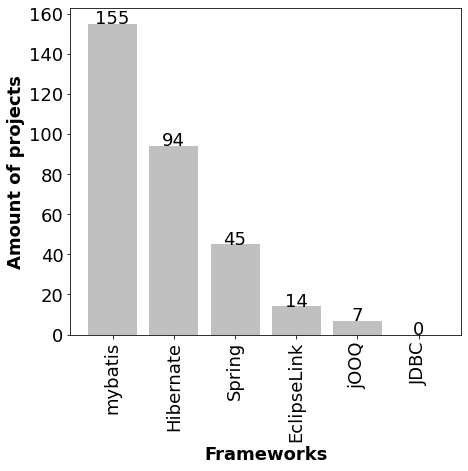

In [100]:
plt.figure(figsize=(7,6))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.xlabel("Frameworks", fontweight = "bold")
plt.ylabel("Amount of projects", fontweight = "bold")
plt.show() 

In [101]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,33.0,44.0,97.0,1.0,52.0,210.0,NaN,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,34.0,12.0,NaN,1.0,88.0,45.0,NaN,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,NaN,1.0,31.0,12.0,1.0,4.0,NaN,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,NaN,9.0,NaN,1.0,3.0,11.0,NaN,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


In [102]:
data_with_index = df.iloc[: , :].sort_values(by='Total DB', ascending=False)
data_with_index.head()

,Projects,N DB-Code Test,N DB-Code Java,N DB-Code XML,N DB-Code Not Java/XML,N Dependencies Test,N Dependencies Code,N Dependencies XML,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
50,mybatis-plus,78.0,86.0,22.0,5.0,131.0,118.0,NaN,NaN,588,270.0,13.265306,14.625850,3.741497,22.278912,20.068027,NaN,45.918367
89,ebean,794.0,18.0,4.0,1.0,NaN,NaN,NaN,NaN,3834,1622.0,20.709442,0.469484,0.104330,NaN,NaN,NaN,42.305686
47,commafeed,NaN,36.0,4.0,6.0,8.0,81.0,NaN,NaN,299,117.0,NaN,12.040134,1.337793,2.675585,27.090301,NaN,39.130435
200,OpenID-Connect-Java-Spring-Server,3.0,37.0,22.0,3.0,25.0,131.0,NaN,NaN,516,165.0,0.581395,7.170543,4.263566,4.844961,25.387597,NaN,31.976744
277,keywhiz,13.0,37.0,4.0,NaN,61.0,67.0,NaN,NaN,459,140.0,2.832244,8.061002,0.871460,13.289760,14.596950,NaN,30.501089


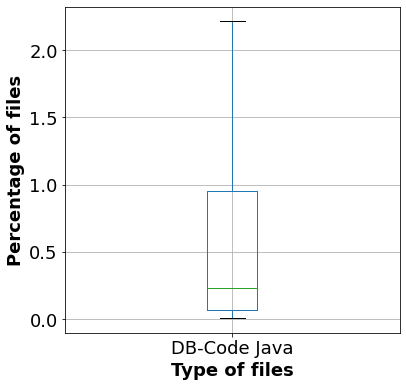

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6, 6))

stud_bplt = df.boxplot(column=['DB-Code Java'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")
plt.show()

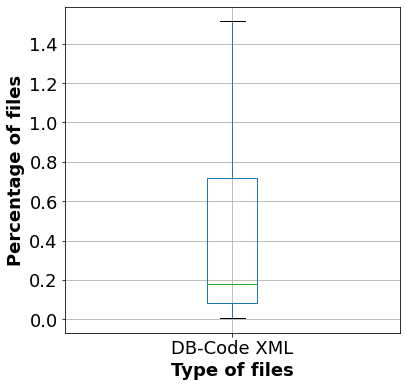

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['DB-Code XML'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()

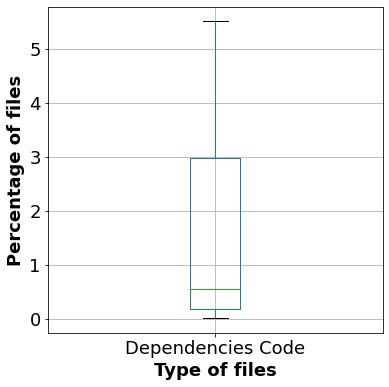

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Dependencies Code'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()

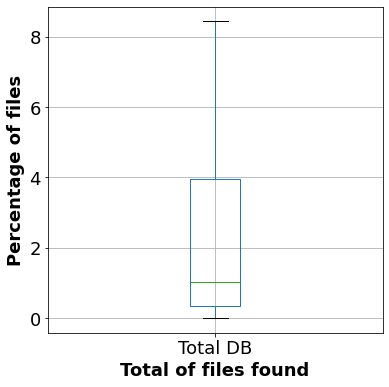

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Total DB'], showfliers=False)

stud_bplt.plot()
plt.xlabel("Total of files found", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()

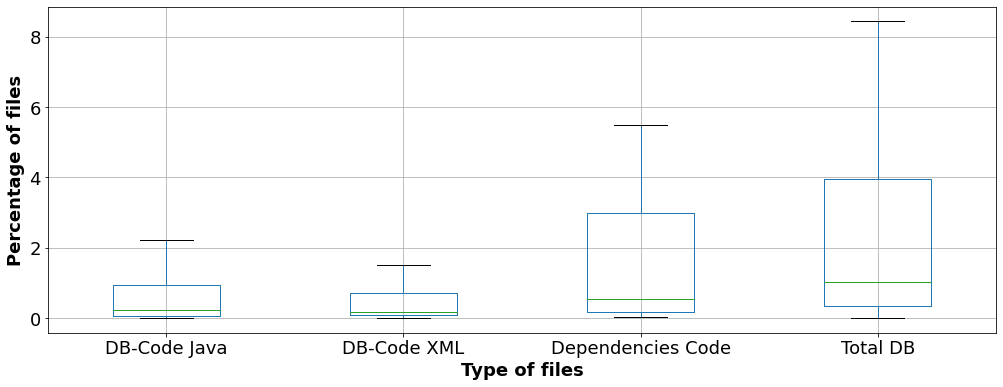

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize =(17, 6))
stud_bplt = df.boxplot(column=['DB-Code Java', 'DB-Code XML', 'Dependencies Code', 'Total DB'], showfliers=False)

stud_bplt.plot()
plt.ylabel("Percentage of files", fontweight = "bold")
plt.xlabel("Type of files", fontweight = "bold")
plt.show()


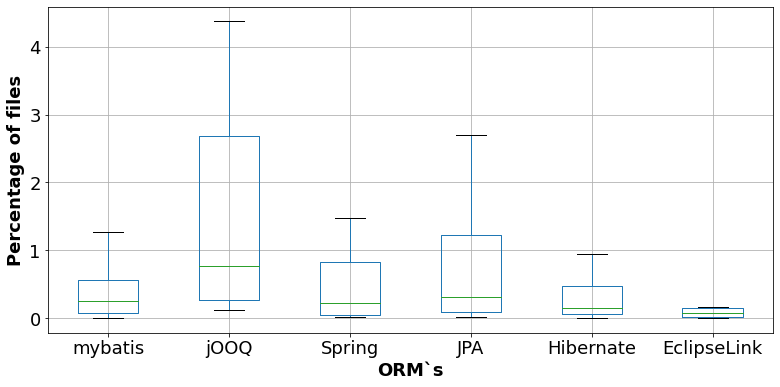

In [108]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['mybatis', 'jOOQ', 'Spring', 'JPA', 'Hibernate', 'EclipseLink'], showfliers=False); #'mybatis', 'jOOQ', 'Spring', 'JPA', 'Hibernate', 'EclipseLink'
stud_bplt.plot()
plt.xlabel("ORM`s", fontweight = "bold")
plt.ylabel("Percentage of files", fontweight = "bold")
plt.show()



In [109]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df.head()

,Projects,Domains,Builder,SQL
0,Activiti,automation,1,1
1,airbyte,infrastructure management,1,1
2,airsonic,media,1,1
3,spring-cloud-alibaba,infrastructure management,1,1
4,nacos,infrastructure management,1,1


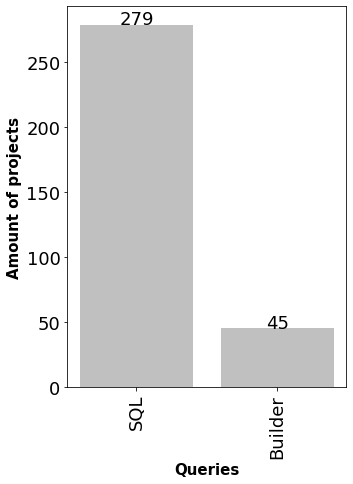

In [110]:
plt.figure(figsize=(5,7))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

df = df.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.xlabel("Queries", fontweight = "bold", fontsize = 15)
plt.ylabel("Amount of projects", fontweight = "bold", fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Type of file', ylabel='Total'>

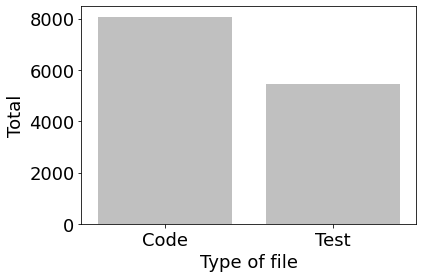

In [111]:
import seaborn as sns

number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'Type of file': ['Code', 'Test'],
    'Total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'Type of file', y = 'Total', data = dados, color = 'silver')

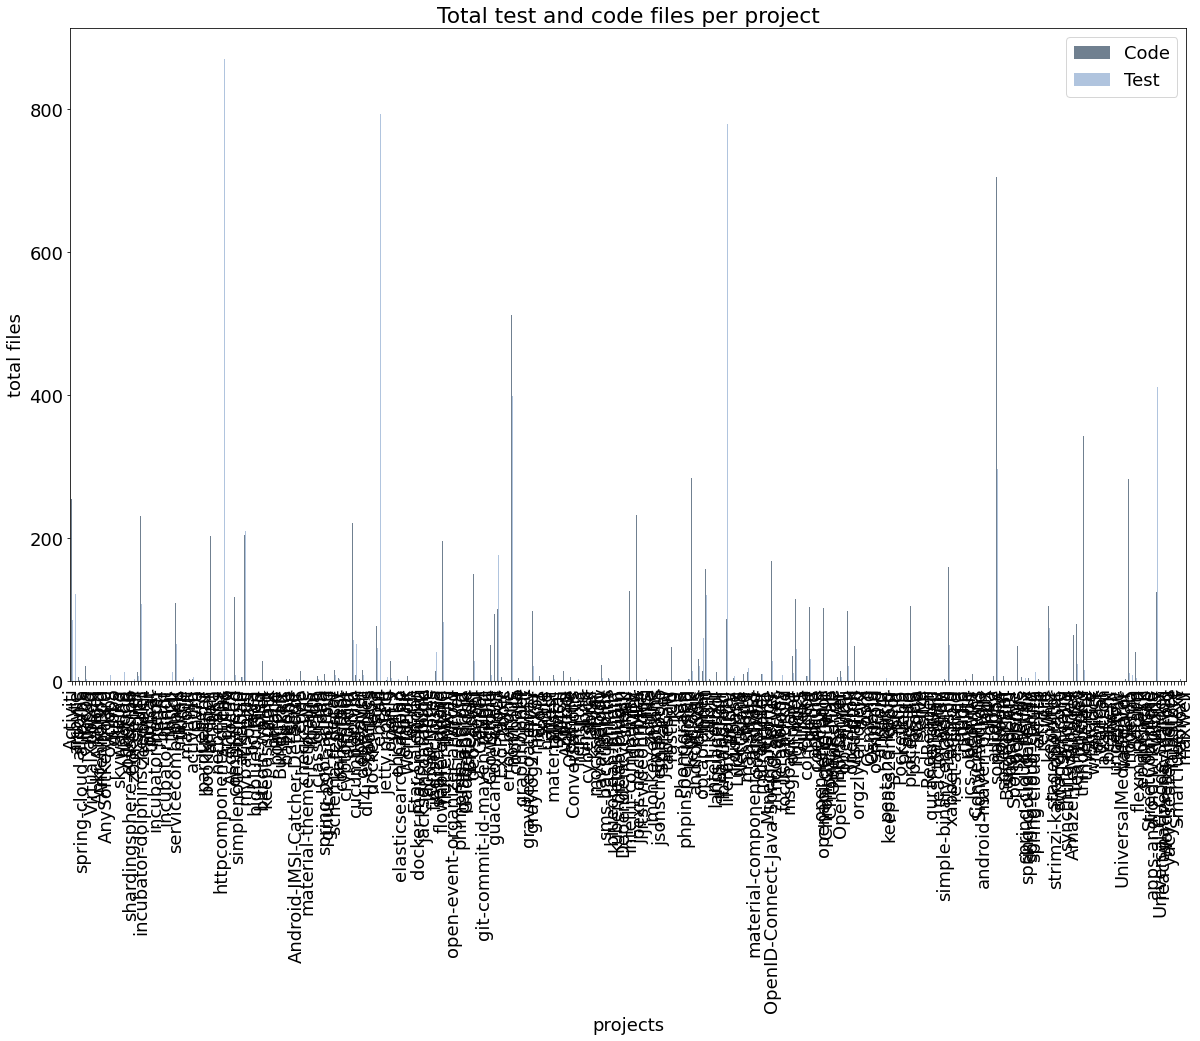

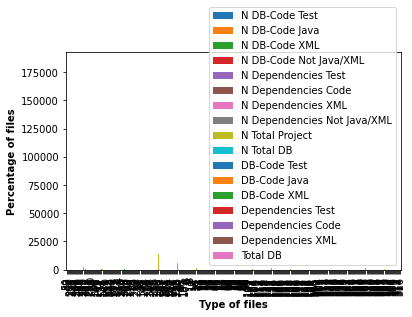

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize =(16, 16))

stud_bplt = data_with_index.plot.bar(column=['N Total DB', 'N Dependencies Code'])

plt.xlabel("Type of files", fontweight = "bold")
plt.ylabel("Percentage of files" , fontweight = "bold")
plt.show()


In [113]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.03, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

KeyboardInterrupt: 

In [114]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


/home/fredlinux/.local/share/virtualenvs/db-mining-rQjX_d4g/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(JPA),(EclipseLink),0.211356,0.044164,0.034700,0.164179,3.717484,0.025366,1.143589,0.926909
11,(JPA),(Spring),0.211356,0.141956,0.066246,0.313433,2.207960,0.036243,1.249760,0.693714
17,(JPA),(Hibernate),0.211356,0.296530,0.123028,0.582090,1.963004,0.060355,1.683303,0.622051
3,(JPA),(mybatis),0.211356,0.488959,0.160883,0.761194,1.556765,0.057539,2.139984,0.453490


In [115]:
ARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


/home/fredlinux/.local/share/virtualenvs/db-mining-rQjX_d4g/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(JPA),(EclipseLink),0.211356,0.044164,0.034700,0.164179,3.717484,0.025366,1.143589,0.926909
11,(JPA),(Spring),0.211356,0.141956,0.066246,0.313433,2.207960,0.036243,1.249760,0.693714
17,(JPA),(Hibernate),0.211356,0.296530,0.123028,0.582090,1.963004,0.060355,1.683303,0.622051
3,(JPA),(mybatis),0.211356,0.488959,0.160883,0.761194,1.556765,0.057539,2.139984,0.453490


In [116]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')
#df_usage_fan_in.rename(columns={"A": "a", "B": "c"})

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
#implementation_usage = implementation_usage.drop(columns=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,N DB-Code Test,...,N Dependencies Not Java/XML,N Total Project,N Total DB,DB-Code Test,DB-Code Java,DB-Code XML,Dependencies Test,Dependencies Code,Dependencies XML,Total DB
0,Activiti,automation,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,33.0,...,NaN,4872,264.0,0.677340,0.903120,1.990969,1.067323,4.310345,NaN,5.418719
1,airbyte,infrastructure management,NaN,jOOQ,NaN,NaN,NaN,NaN,NaN,34.0,...,NaN,6172,202.0,0.550875,0.194426,NaN,1.425794,0.729099,NaN,3.272845
2,airsonic,media,mybatis,NaN,NaN,NaN,NaN,NaN,EclipseLink,NaN,...,NaN,1535,6.0,NaN,0.065147,2.019544,0.065147,0.260586,NaN,0.390879
3,spring-cloud-alibaba,infrastructure management,NaN,NaN,Spring,NaN,NaN,Hibernate,NaN,NaN,...,NaN,645,NaN,NaN,NaN,0.310078,NaN,NaN,NaN,NaN
4,nacos,infrastructure management,mybatis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1939,26.0,NaN,0.464157,NaN,0.154719,0.567303,NaN,1.340897


In [117]:
implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Total DB'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()




,ListFrameworks,NumberDBFiles
0,,"[0.3908794788273616, 1.340897369778236, nan, n..."
1,Hibernate,"[nan, 0.482218203737191, 0.627177700348432, na..."
2,JPA,"[nan, nan, 4.826254826254826, 0.85959885386819..."
3,JPA/Hibernate,"[0.6314127861089187, 0.8616529951058111, nan, ..."
4,Spring,"[nan, nan, nan, nan, 45.91836734693878, nan, n..."


In [118]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.rename(columns = {'(IgnoreCase, SQL)':'SQL'})
df['SumPerProject'] = df.sum(axis=1)

df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)


Projects         44
Domains          44
Builder          44
SQL              44
SumPerProject    44
dtype: int64
Projects         279
Domains          279
Builder          279
SQL              279
SumPerProject    279
dtype: int64
Projects         45
Domains          45
Builder          45
SQL              45
SumPerProject    45
dtype: int64
Projects         37
Domains          37
Builder          37
SQL              37
SumPerProject    37
dtype: int64


/home/fredlinux/.local/share/virtualenvs/db-mining-rQjX_d4g/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


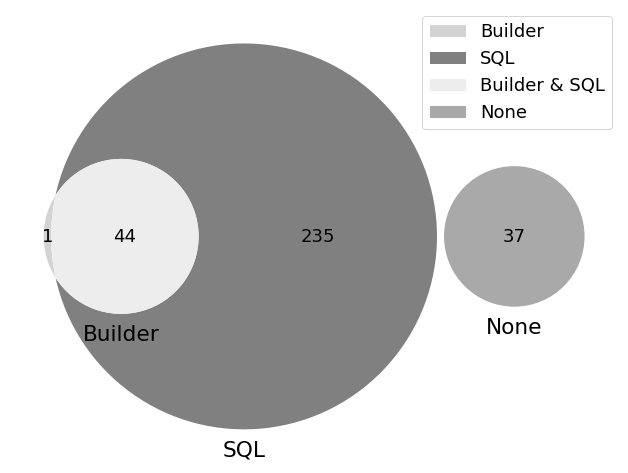

In [119]:
plt.figure(figsize=(11,9))
count_Builder = ((df['Builder'] == 1) & (df['SQL'] == 0)).sum()
count_SQL = ((df['Builder'] == 0) & (df['SQL'] == 1)).sum()
count_intersection = ((df['Builder'] == 1) & (df['SQL'] == 1)).sum()
count_neither = ((df['Builder'] == 0) & (df['SQL'] == 0)).sum()

venn = venn3(subsets=(count_Builder, count_SQL, count_intersection, count_neither, 0, 0, 0), set_labels=('Builder', 'SQL', 'None'), set_colors=('lightgray', 'gray', 'darkgray'), alpha=1.0)

legend_labels = ['Builder', 'SQL', 'Builder & SQL', 'None']
plt.legend(legend_labels)


plt.show()